In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from skimage import draw
import pickle
import utils

from multiprocessing import Pool


In [2]:
# jupyter extension that allows reloading functions from imports without clearing kernel :D
%load_ext autoreload
%autoreload 2

In [21]:
img = cv2.imread('./images/inputs/cat.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('./images/inputs/tiger.jpg')
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img = cv2.resize(img, (300, 300))
img2 = cv2.resize(img2, (300, 300))

In [22]:
specify_new_points = True
write_back = False

In [23]:
def specify_points(img):
    fig = plt.figure()
    fig.set_label('Select key matching points in the image')
    plt.axis('off')
    plt.imshow(img[:,:,[2,1,0]])
    H, W, C = img.shape
    clicked = []

    def on_mouse_pressed(event, ps):
        x = round(event.xdata)
        y = round(event.ydata)
        plt.plot(x, y, 'ro')
        ps.append([x, y])
    fig.canvas.mpl_connect('button_press_event', lambda event: on_mouse_pressed(event, clicked))

    return clicked

<IPython.core.display.Javascript object>


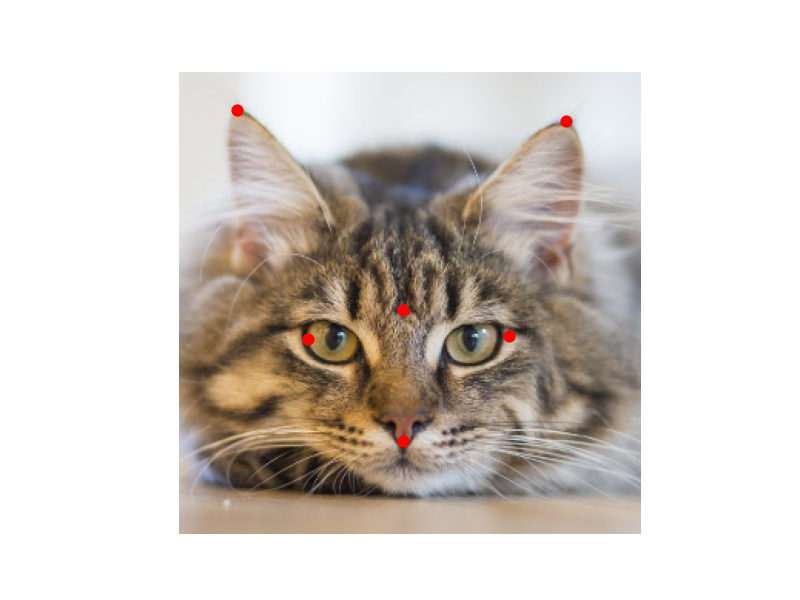

Specify
[]


In [24]:
if specify_new_points:
    %matplotlib notebook
    points = specify_points(img)
    print("Specify")
else:
    points = pickle.load(open('points.pkl', 'rb'))
print(points)

<IPython.core.display.Javascript object>


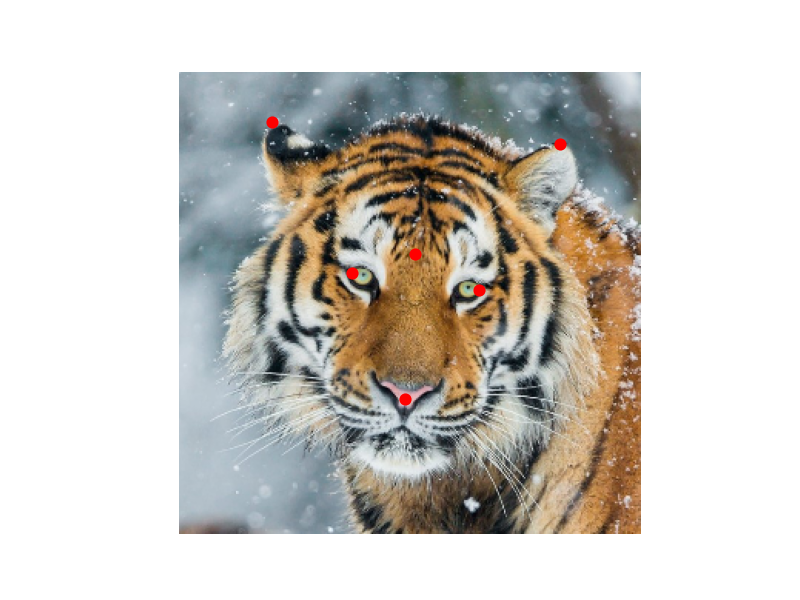

Specify


In [25]:
if specify_new_points:
    %matplotlib notebook
    points_2 = specify_points(img2)
    print("Specify")
else:
    points_2 = pickle.load(open('points_2.pkl', 'rb'))

In [9]:
if write_back:
    pickle.dump(points, open('points.pkl', 'wb'))
    pickle.dump(points_2, open('points_2.pkl', 'wb'))

In [26]:
points = np.array(points)
points_2 = np.array(points_2)

<IPython.core.display.Javascript object>


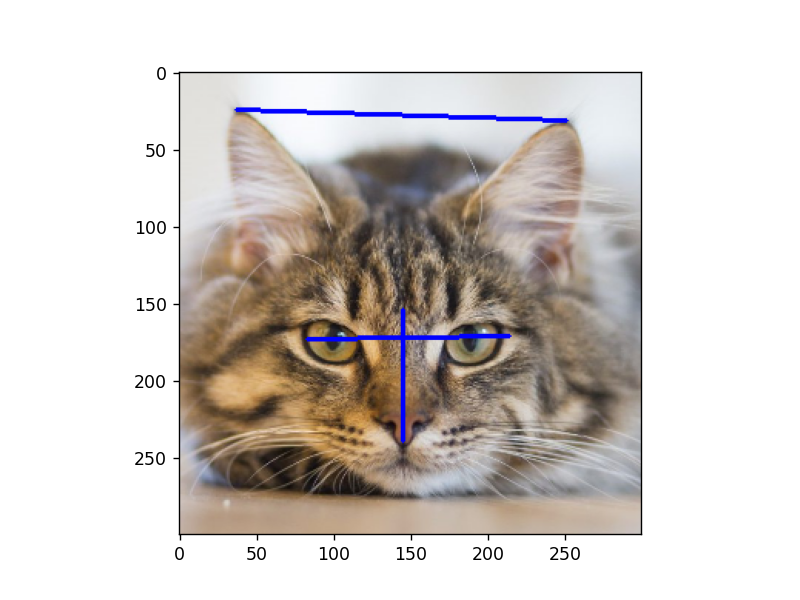

<IPython.core.display.Javascript object>


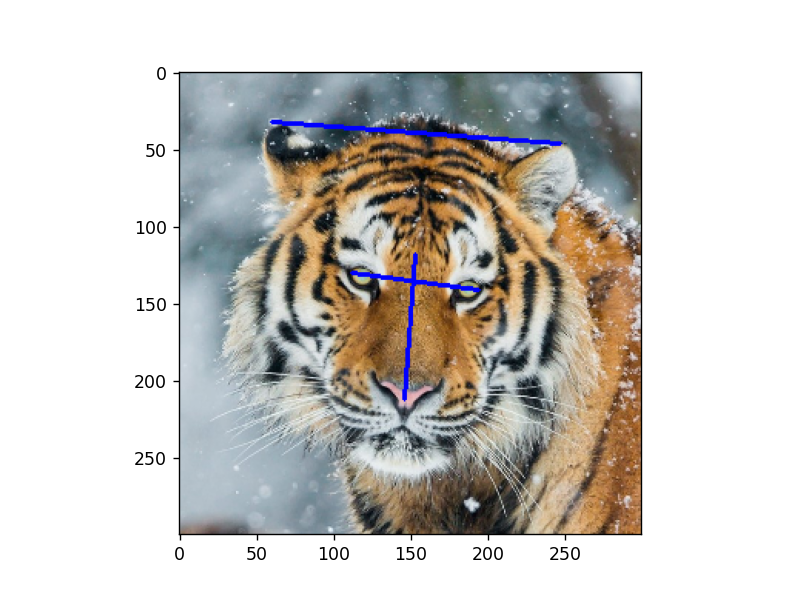

In [27]:
def drawLines(p_coords, q_coords, image):
    for idx in range(len(p_coords)):
        cv2.line(image, p_coords[idx], q_coords[idx], (255,0,0), 2)
    fig = plt.figure()
    plt.imshow(image[:,:,[2,1,0]])


points = np.array(points)
points_2 = np.array(points_2)

# Each PQ is a line segment
# lines in source image
p_coords = points[0::2]
q_coords = points[1::2]


# lines in dest image
p_prime_coords = points_2[0::2]
q_prime_coords = points_2[1::2]

# visualize the lines
drawLines(p_coords, q_coords, img.copy())
drawLines(p_prime_coords, q_prime_coords, img2.copy())


In [28]:
p = np.array(p_coords)
q = np.array(q_coords)
p_prime = np.array(p_prime_coords)
q_prime = np.array(q_prime_coords)
len(p)==len(q)==len(p_prime)==len(q_prime)



True

In [29]:
duration = 3 # in seconds
fps = 30
num_frames = duration * fps
#num_frames = 2
pool = Pool(processes=6)
argument = [( frame_idx, num_frames, img, img2,p, q, p_prime, q_prime) for frame_idx in range(num_frames + 1)]
result = pool.starmap(utils.generate_frames_feature_based, argument)
print("all frames written")

all frames written


In [30]:
# write the video
frames_dir = 'images/outputs/feature_based_2'
video_output_dir = 'images/outputs/feature_based.mpeg'
utils.imageFolder2mpeg(frames_dir, video_output_dir, fps=fps)
print('done')


OpenCV: FFMPEG: tag 0x3147504d/'MPG1' is not supported with codec id 1 and format 'mpeg / MPEG-1 Systems / MPEG program stream'


done
